# Project: Investigate a Dataset (tmdb-movies by Youssef Hussein)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
- This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 21)

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


## Questions
### Q1: Which genres are most popular from year to year?
### Q2: What kinds of properties are associated with movies that have high revenues?
### Q3: What are the top 10 most successful movies at all times?

<a id='wrangling'></a>
## Data Wrangling (Handling unused and missing values)

- Drop unnecessary columns: imdb_id, homepage, tagline, keywords and overview.
- Drop duplicated id rows.
- Handling missing values in the columns: cast, director, genres and production_companies.
- Change release_date dytbe from string to datetime.
- Change budget_adj and revenue_adj dtypes to int64.
- Removing rows with 0 value in budget, budget_adj, revenue and revenue_adj columns.

### Note:
I didn't understand why should I replace 0 with NaN in runtime column as mentioned in the previous Feedback.. Please explain!

In [3]:
# print size
df.shape

(10866, 21)

In [4]:
# check for duplicates
df.duplicated().sum()

1

In [5]:
# check for rows with duplicated id
df.id.duplicated().sum()

1

In [6]:
# check for na values
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# check data types
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [8]:
# check rows with 0 values in columns: budget, revenue, budget_adj and revenue_adj
df[df.budget == 0].budget.value_counts()
df[df.revenue == 0].revenue.value_counts()
df[df.budget_adj == 0].budget_adj.value_counts()
df[df.revenue_adj == 0].revenue_adj.value_counts()

0.0    6016
Name: revenue_adj, dtype: int64

### Data Cleaning

In [9]:
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis='columns', inplace=True)

In [10]:
# drop rows with duplicated id
df.drop(df[df.id.duplicated()].index, inplace=True)

In [11]:
# remove rows with all null values
df.dropna(axis='index', how='all', inplace=True)

In [12]:
# fill na with MISSING instead
df.fillna('MISSING', inplace=True)

In [13]:
# convert release_date type
df.release_date = pd.to_datetime(df.release_date, format='%m/%d/%y')

In [14]:
# convert budget_adj and revenue_ad type
df.budget_adj = df.budget_adj.astype(np.int64)
df.revenue_adj = df.revenue_adj.astype(np.int64)

### Replace 0 values with mode value in columns: budget, revenue, budget_adj and revenue_adj

In [15]:
budget_mode = df[df.budget != 0].budget.mode()
df.budget = df.budget.replace([0], budget_mode)

In [16]:
revenue_mode = df[df.revenue != 0].revenue.mode().astype(np.int64)
df.budget = df.budget.replace([0], revenue_mode)

In [17]:
budget_adj_mode = df[df.budget_adj != 0].budget_adj.mode()[0]
df.budget = df.budget.replace([0], budget_adj_mode)

In [18]:
revenue_adj_mode = df[df.revenue_adj != 0].revenue_adj.mode()
df.budget = df.budget.replace([0], revenue_adj_mode)

In [19]:
df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                       int64
revenue_adj                      int64
dtype: object

In [20]:
# drop rows with 0 value in budget, budget_adj, revenue and revenue_adj columns
df.drop(df[df.budget==0].index, inplace=True)
df.drop(df[df.budget_adj==0].index, inplace=True)
df.drop(df[df.revenue==0].index, inplace=True)
df.drop(df[df.revenue_adj==0].index, inplace=True)
df.shape

(3853, 16)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Which genres are most popular from year to year?)

In [21]:
# extract df with multi genres values
df.genres = df.genres.str.replace('|', ',')
multi_genres_df = df[df.genres.str.contains(',')]
multi_genres_df.genres.str.contains(',').sum()

3204

In [22]:
# create 5 copies
df1 = multi_genres_df.copy()
df2 = multi_genres_df.copy()
df3 = multi_genres_df.copy()
df4 = multi_genres_df.copy()
df5 = multi_genres_df.copy()

In [23]:
# extract every single genre
df1.genres = df1.genres.apply(lambda x: x.split(',')[0])
df2.genres = df2.genres.apply(lambda x: x.split(',')[1])
df3.genres = df3.genres.apply(lambda x: x.split(',')[2] if len(x.split(','))>=3 else None)
df4.genres = df4.genres.apply(lambda x: x.split(',')[3] if len(x.split(','))>=4 else None)
df5.genres = df5.genres.apply(lambda x: x.split(',')[4] if len(x.split(','))>=5 else None)

In [24]:
# drop na values in df3, df4 and df5
df3.dropna(inplace = True)
df4.dropna(inplace = True)
df5.dropna(inplace = True)

In [25]:
total_genres_df = pd.concat([df1, df2, df3, df4, df5])
total_genres_df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939,1392445892
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939,348161292


In [26]:
# drop the original multi grenes rows
df.drop(multi_genres_df.index, inplace=True)

In [27]:
# add in our newly separated rows
df = df.append(total_genres_df)
df.shape

(10301, 16)

In [28]:
# group by release year and genres to get popularity for each genre per year
pop_per_year = df.groupby(['release_year', 'genres'])[['popularity']].sum()

# sort values by popularity to get the top genres per year
pop_per_year.sort_values(by=['release_year', 'popularity'], ascending=[True, False], inplace=True)
pop_per_year

popularity
release_year genres               
1960         Drama        4.694612
             Action       3.009075
             Horror       2.610362
             Thriller     2.610362
             Adventure    1.872132
...                            ...
2015         Horror      25.595838
             Western     15.009100
             Music       12.522510
             History     11.291968
             War          9.716191

[842 rows x 1 columns]

In [29]:
# reset index and drop duplicated years to get the max genre popularity for each year
most_pop_per_year = pop_per_year.reset_index()
most_pop_per_year.drop(most_pop_per_year[most_pop_per_year.release_year.duplicated()].index, inplace=True)
most_pop_per_year.head()

,release_year,genres,popularity
0,1960,Drama,4.694612
9,1961,Comedy,4.978082
22,1962,Adventure,4.865526
30,1963,Thriller,4.092655
40,1964,Comedy,5.010488


### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [30]:
# create a df that contains properties that is possible affect revenues
where_to_look_df = df[['revenue', 'original_title', 'budget', 'cast', 'director', 'genres']]
sorted_by_revenue_df = where_to_look_df.sort_values(by=['revenue'], ascending=False)
sorted_by_revenue_df.head()

,revenue,original_title,budget,cast,director,genres
1386,2781505847,Avatar,237000000,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Fantasy
1386,2781505847,Avatar,237000000,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Action
1386,2781505847,Avatar,237000000,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Adventure
1386,2781505847,Avatar,237000000,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,Science Fiction
3,2068178225,Star Wars: The Force Awakens,200000000,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Adventure


In [31]:
# genres that repeated in the
genres = where_to_look_df.genres.unique()
genres

array(['Action', 'Comedy', 'Drama', 'Horror', 'Thriller', 'Animation',
       'Science Fiction', 'Documentary', 'Fantasy', 'War', 'Adventure',
       'Music', 'Western', 'Romance', 'History', 'Mystery', 'Family',
       'Crime', 'TV Movie', 'Foreign'], dtype=object)

In [32]:
# dict that contains top 50 genres that repeat in the df and their movies revenues mean
revenue_mean_per_genres = {}
for i in genres[:50]:
    revenue_mean_per_genres[i] = where_to_look_df[where_to_look_df.genres == i].revenue.mean()
revenue_mean_per_genres

{'Action': 156577156.78709677,
 'Comedy': 97408293.99778923,
 'Drama': 74327265.89009112,
 'Horror': 57287803.583153345,
 'Thriller': 97740462.8230897,
 'Animation': 257121500.2039801,
 'Science Fiction': 163933126.61657032,
 'Documentary': 22524400.0,
 'Fantasy': 218234134.3838384,
 'War': 106032069.99159664,
 'Adventure': 218291850.8504673,
 'Music': 82667587.58823529,
 'Western': 87412920.98076923,
 'Romance': 85876756.71771772,
 'History': 81405236.49612403,
 'Mystery': 91045775.19476745,
 'Family': 203153546.74117646,
 'Crime': 84143092.41013825,
 'TV Movie': 42000000.0,
 'Foreign': 11115957.615384616}

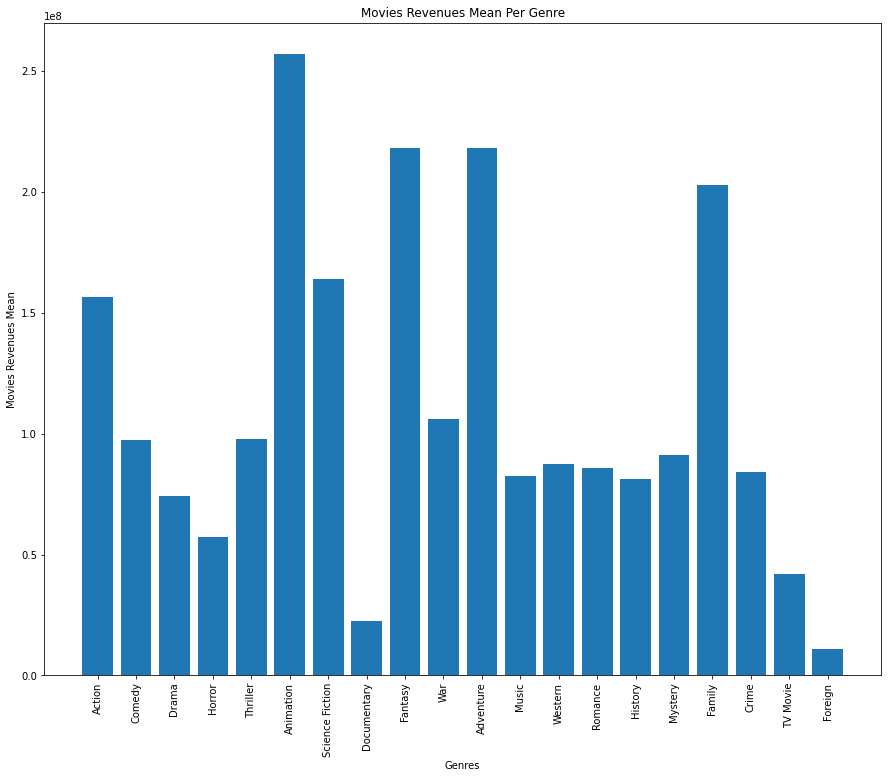

In [33]:
# compare movies revenues mean of each genre
plt.subplots(figsize=(15,12))
plt.xticks(rotation='vertical')
plt.bar(revenue_mean_per_genres.keys(), revenue_mean_per_genres.values())
plt.title("Movies Revenues Mean Per Genre")
plt.xlabel("Genres")
plt.ylabel("Movies Revenues Mean");

- Genres is one of properties that affect movie revenues.
- Animation, Fantcy, Advnature and Family are the genres of movies that have the heighest revenue average over years.

In [34]:
# drop genres and their copies to not affect other results 
where_to_look_df.drop('genres', axis='columns', inplace=True)
where_to_look_df.drop_duplicates(inplace=True)

C:\Users\Youssef Hussein\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-34-f8c7d5527cc9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  where_to_look_df.drop_duplicates(inplace=True)


In [35]:
# check numerical correlations
where_to_look_df.corr()

,revenue,budget
revenue,1.000000,0.688519
budget,0.688519,1.000000


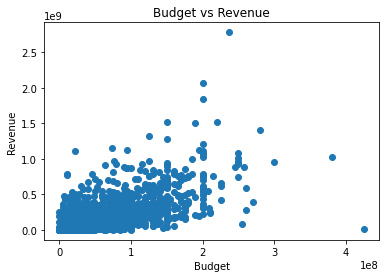

In [36]:
# relation between Budget vs Revenue
plt.scatter(where_to_look_df.budget, where_to_look_df.revenue)
plt.title("Budget vs Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue");

In [37]:
# convert cast to main actor to see if actors affect revenues
where_to_look_df.cast = where_to_look_df.cast.apply(lambda x: x.split('|')[0])
where_to_look_df.rename(columns={'cast':'main_actor'}, inplace=True)

C:\Users\Youssef Hussein\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\Youssef Hussein\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [38]:
# actors that repeated in the
actors = where_to_look_df.main_actor.unique()

In [39]:
revenue_mean_per_actor = {}
for i in actors[:50]:
    revenue_mean_per_actor[i] = where_to_look_df[where_to_look_df.main_actor == i].revenue.mean()
revenue_mean_per_actor

{'Tom Cruise': 296922046.9259259,
 'Mark Wahlberg': 129199847.36842105,
 'Robert De Niro': 85417799.85714285,
 'Bradley Cooper': 206524372.0,
 'Eddie Redmayne': 92696731.5,
 'Michael B. Jordan': 137935567.0,
 'Amy Schumer': 140795793.0,
 'Will Smith': 340846111.1333333,
 'Joseph Gordon-Levitt': 41086139.9,
 'Arnold Schwarzenegger': 156670661.26923078,
 'Will Ferrell': 136663825.3846154,
 'Kate Winslet': 405276451.4,
 'Shannyn Sossamon': 52882018.0,
 'Jennifer Lopez': 91456804.8,
 'Jeremy Piven': 26807089.0,
 'Kevin Hart': 66327997.333333336,
 'Helen Mirren': 60662023.222222224,
 'Tina Fey': 62281500.666666664,
 'Bryan Cranston': 29300519.0,
 'Robert Redford': 74645882.08333333,
 'Andrew Garfield': 486448405.3333333,
 'Rob Corddry': 12314651.0,
 'Al Pacino': 66999065.058823526,
 'Vince Vaughn': 93827216.75,
 'Kevin Costner': 105868752.4,
 'Kate Bosworth': 22590982.333333332,
 'Priscilla C. Shirer': 67790117.0,
 'Jeremy Irvine': 11248448.5,
 'Cameron Diaz': 168763056.2,
 'Jason Bateman':

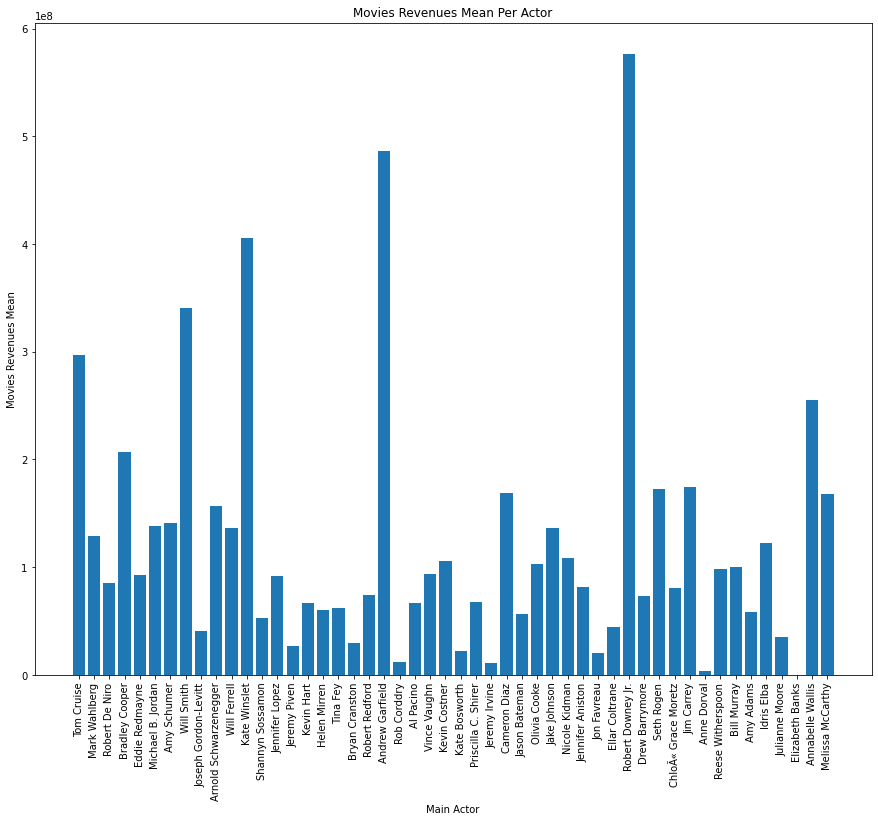

In [40]:
# compare movies revenues mean of each actor
plt.subplots(figsize=(15,12))
plt.xticks(rotation='vertical')
plt.bar(revenue_mean_per_actor.keys(), revenue_mean_per_actor.values())
plt.title("Movies Revenues Mean Per Actor")
plt.xlabel("Main Actor")
plt.ylabel("Movies Revenues Mean");

- Cast is one of properties that affect movie revenues.
- Robert Downey Jr, Andrew Garfield, Kate Winslet and Will Smith are the actors that their movies have the heighest revenue average over years.

In [41]:
# directors that repeated in the
directors = where_to_look_df.director.unique()
directors

array(['Christopher McQuarrie', 'Seth MacFarlane', 'Nancy Meyers', ...,
       'Don Taylor|Mike Hodges', 'Martin Rosen', 'Howard Hawks'],
      dtype=object)

In [42]:
# dict that contains top 50 director that repeat in the df and their movies revenues mean
revenue_mean_per_director = {}
for i in directors[:50]:
    revenue_mean_per_director[i] = where_to_look_df[where_to_look_df.director == i].revenue.mean()
revenue_mean_per_director

{'Christopher McQuarrie': 450335367.0,
 'Seth MacFarlane': 382615960.5,
 'Nancy Meyers': 249735494.4,
 'John Wells': 38559419.0,
 'Tom Hooper': 306737614.0,
 'Ryan Coogler': 137935567.0,
 'Judd Apatow': 123767863.2,
 'Peter Landesman': 24638611.5,
 'Jonathan Levine': 52866104.0,
 'Henry Hobson': 187112.0,
 'Sean Anders': 105955013.0,
 'Jocelyn Moorhouse': 20957065.0,
 'Ciaran Foy': 52882018.0,
 'Rob Cohen': 141631099.1,
 'Doug Ellin': 49263404.0,
 'Jeremy Garelick': 79799880.0,
 'Simon Curtis': 48338734.5,
 'Jason Moore': 110180739.5,
 'Jay Roach': 203232078.375,
 'Etan Cohen': 106511453.0,
 'James Vanderbilt': 2541554.0,
 'Ramin Bahrani': 1411927.0,
 'Steve Pink': 41098651.5,
 'David Gordon Green': 28699916.333333332,
 'Ken Scott': 32797679.5,
 'Mike Binder': 21896748.5,
 'Michael Polish': 7986794.0,
 'Alex Kendrick': 36486746.5,
 'Roland Emmerich': 377036174.8888889,
 'Jake Kasdan': 90641122.5,
 'Stiles White': 102529779.0,
 'Luke Greenfield': 77926777.25,
 'Paul King': 259207227.0,


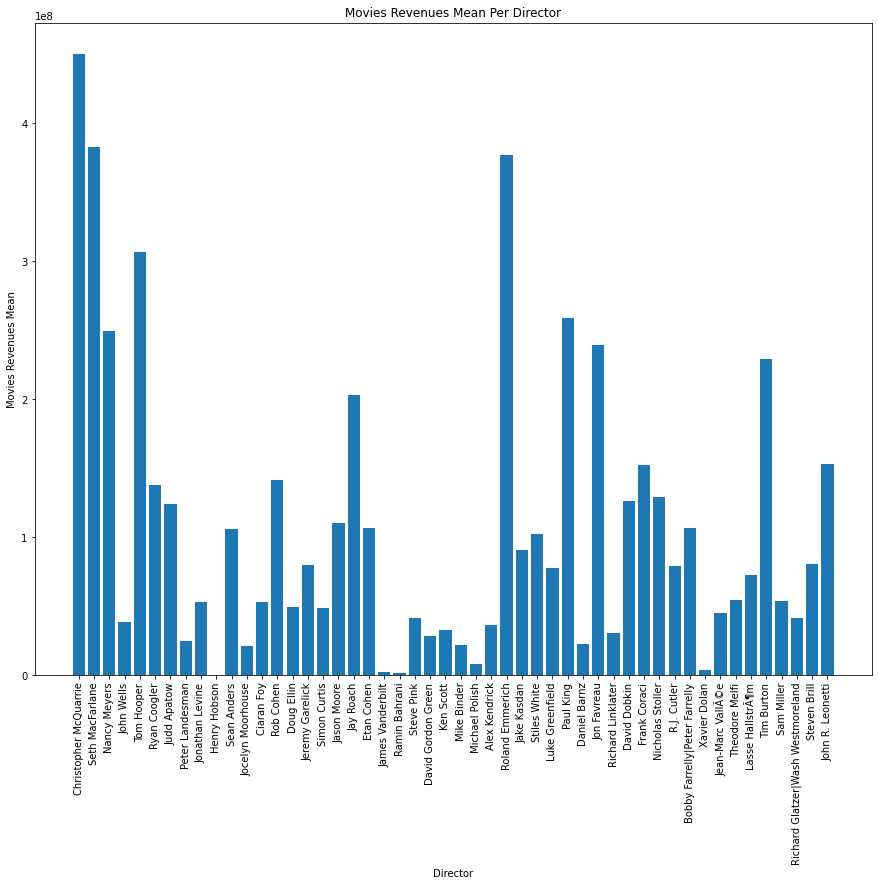

In [43]:
# compare movies revenues mean of each director 
plt.subplots(figsize=(15,12))
plt.xticks(rotation='vertical')
plt.bar(revenue_mean_per_director.keys(), revenue_mean_per_director.values())
plt.title("Movies Revenues Mean Per Director")
plt.xlabel("Director")
plt.ylabel("Movies Revenues Mean");

- Director is one of properties that affect movie revenues.
- Christopher McQuarrie, Seth MacFarlane, Roland Emmerich and Tom Hooper are the directors that their movies have the heighest revenue average over years.

### Research Question 3 (What are the top 10 most successful movies at all times?)
By finding top 10 movies with max revenue_adj and least budget_adj then subtract budget_adj from revenue_adj to calculate the diffrence then sort according it

In [44]:
top10 = df[['original_title', 'revenue_adj', 'budget_adj']]
top10.drop_duplicates(inplace=True)
top10

<ipython-input-44-2e9619b8a2f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10.drop_duplicates(inplace=True)


,original_title,revenue_adj,budget_adj
25,Mission: Impossible - Rogue Nation,627743451,137999939
26,Ted 2,198594430,62559972
51,The Intern,178999419,32199985
55,Burnt,33678188,18399991
58,The Danish Girl,59056175,13799993
...,...,...,...
10793,Watership Down,12414014,3342700
10828,Torn Curtain,87334190,20154044
10829,El Dorado,40308088,31258922
10835,The Sand Pebbles,134360293,80616176


In [45]:
top10 = top10.sort_values(by=['revenue_adj', 'budget_adj'], ascending=[False, True]).head(10)
top10['actual_revenue'] = top10['revenue_adj'] - top10['budget_adj']
top10

,original_title,revenue_adj,budget_adj,actual_revenue
1386,Avatar,2827123750,240886902,2586236848
1329,Star Wars,2789712242,39575591,2750136651
5231,Titanic,2506405735,271692064,2234713671
10594,The Exorcist,2167324901,39289276,2128035625
9806,Jaws,1907005841,28362748,1878643093
3,Star Wars: The Force Awakens,1902723129,183999919,1718723210
8889,E.T. the Extra-Terrestrial,1791694309,23726245,1767968064
8094,The Net,1583049536,31481271,1551568265
10110,One Hundred and One Dalmatians,1574814739,29179444,1545635295
4361,The Avengers,1443191435,208943741,1234247694


In [46]:
top10 = top10.sort_values(by='actual_revenue', ascending=False)
top10

,original_title,revenue_adj,budget_adj,actual_revenue
1329,Star Wars,2789712242,39575591,2750136651
1386,Avatar,2827123750,240886902,2586236848
5231,Titanic,2506405735,271692064,2234713671
10594,The Exorcist,2167324901,39289276,2128035625
9806,Jaws,1907005841,28362748,1878643093
8889,E.T. the Extra-Terrestrial,1791694309,23726245,1767968064
3,Star Wars: The Force Awakens,1902723129,183999919,1718723210
8094,The Net,1583049536,31481271,1551568265
10110,One Hundred and One Dalmatians,1574814739,29179444,1545635295
4361,The Avengers,1443191435,208943741,1234247694


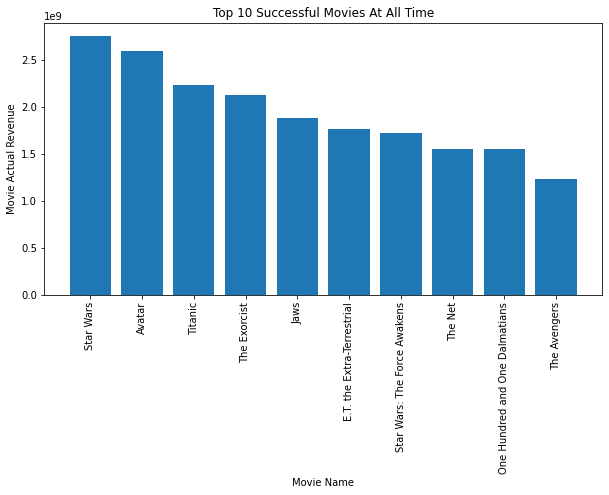

In [47]:
# top 10 movies vs their actual_revenue
plt.subplots(figsize=(10,5))
plt.xticks(rotation='vertical')
plt.bar(top10.original_title, top10.actual_revenue)
plt.title("Top 10 Successful Movies At All Time")
plt.xlabel("Movie Name")
plt.ylabel("Movie Actual Revenue");

This is a list of the top 10 most successful movies over all time:
- Star Wars
- Avatar
- Titanic
- The Exorcist
- Jaws
- E.T. The Extra-Terrestrial
- Star Wars: The Force Awakens
- The Net
- One Hundred and One Dalmatians
- The Avengers

<a id='conclusions'></a>
## Conclusions

### Reasoning/ Findings:
- Over years, there has been a relation between movie genre and the revenues.
- Animation movies have the max average value of movies revenues over years (257121500.2039801) followed by Advnature movies (218291850.8504673)
- The following plot shows the movies revenues average for each genre over years.
- There is a positive relation between Budget and Revenue.
- Robert Downey Jr movies have the max average value of movies revenues over years (576750082.9090909) followed by 'Andrew Garfield movies (486448405.3333333)
- Christopher McQuarrie movies have the max average value of movies revenues (450335367.0) followed by Seth MacFarlane movies (382615960.5).
- Star Wars is the most successful movie at all time with atual revenue equal to (2750136650.9191761) followed by Avatar with atual revenue equal to (2586236847.524277


### Limitations:
- Data set has too few numerical data that could be used to do some statistical test.
- Some columns of data sets has no clear refernce that can be categorised such as: cast and production_companies and genres.
- The budget and revenue columns did not have a specific currency.
- Rows with NaN values were dropped, hence a lot of key data might have been lost in the process.
- There are a lot of crew members apart from the director, cast and the production companies who help in creating a movie like writers, screenplay writers, editors, etc. but there was no data to analyse those aspects.